<a href="https://colab.research.google.com/github/rajuatmakuri5/fresh_or_rotten_fruit/blob/main/Freshness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq unpackai
!pip install -Uqq fastbook

     |████████████████████████████████| 85 kB 2.2 MB/s 
     |████████████████████████████████| 720 kB 4.2 MB/s 
     |████████████████████████████████| 1.2 MB 41.6 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 186 kB 51.9 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 51 kB 298 kB/s 


In [3]:
from unpackai.utils import clean_error_img
from fastbook import *
from fastai.vision.widgets import *

In [4]:
! pip install kaggle


In [5]:
! mkdir ~/.kaggle

In [10]:
! cp 'kaggle.json' ~/.kaggle/

In [11]:
! chmod 600 ~/.kaggle/'kaggle.json'

In [ ]:
! kaggle datasets download sriramr/fruits-fresh-and-rotten-for-classification

In [ ]:
!unzip fruits-fresh-and-rotten-for-classification.zip

In [14]:
path = Path().cwd()/"dataset"
path.ls()

(#3) [Path('/content/dataset/test'),Path('/content/dataset/dataset'),Path('/content/dataset/train')]

In [15]:
clean_error_img(path)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/381 [00:00<?, ?it/s]

  0%|          | 0/388 [00:00<?, ?it/s]

  0%|          | 0/403 [00:00<?, ?it/s]

  0%|          | 0/530 [00:00<?, ?it/s]

  0%|          | 0/601 [00:00<?, ?it/s]

  0%|          | 0/395 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/381 [00:00<?, ?it/s]

  0%|          | 0/388 [00:00<?, ?it/s]

  0%|          | 0/403 [00:00<?, ?it/s]

  0%|          | 0/530 [00:00<?, ?it/s]

  0%|          | 0/601 [00:00<?, ?it/s]

  0%|          | 0/395 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1581 [00:00<?, ?it/s]

  0%|          | 0/1466 [00:00<?, ?it/s]

  0%|          | 0/1595 [00:00<?, ?it/s]

  0%|          | 0/2224 [00:00<?, ?it/s]

  0%|          | 0/2342 [00:00<?, ?it/s]

  0%|          | 0/1693 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1581 [00:00<?, ?it/s]

  0%|          | 0/1466 [00:00<?, ?it/s]

  0%|          | 0/1595 [00:00<?, ?it/s]

  0%|          | 0/2224 [00:00<?, ?it/s]

  0%|          | 0/2342 [00:00<?, ?it/s]

  0%|          | 0/1693 [00:00<?, ?it/s]

In [16]:
Fruits = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [17]:
dls = Fruits.dataloaders(path)

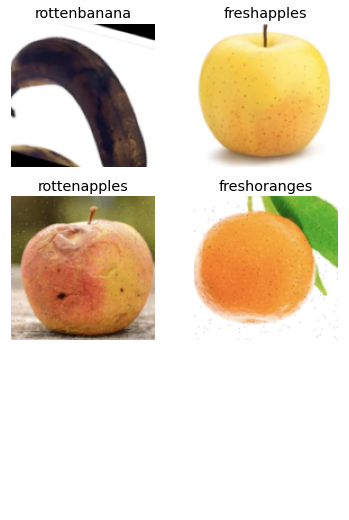

In [18]:
dls.valid.show_batch(max_n=4, nrows=3)

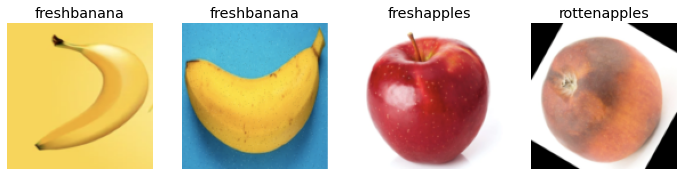

In [19]:
Fruits = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(128, ResizeMethod.Squish)
)
dls = Fruits.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

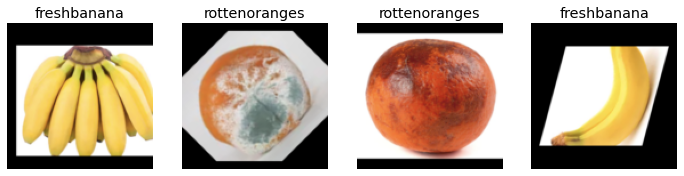

In [21]:
Fruits = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')
)
dls = Fruits.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

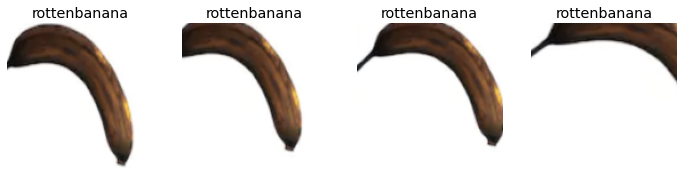

In [22]:
Fruits = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(128, min_scale=0.3)
)
dls = Fruits.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


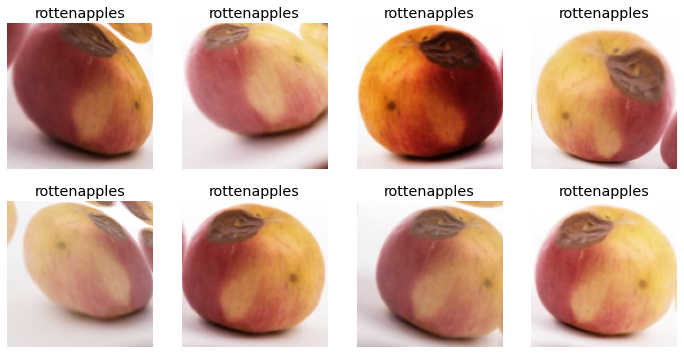

In [23]:
Fruits = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2)
)
dls = Fruits.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [24]:
Fruits = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = Fruits.dataloaders(path)

In [25]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,accuracy,time
0,0.131742,0.041046,0.985475,03:52


epoch,train_loss,valid_loss,accuracy,time
0,0.030616,0.005855,0.997610,04:57
1,0.007136,0.001453,0.999265,04:58


In [26]:
#@title Build the functionality of our Notebook App
uploader = widgets.FileUpload()
output = widgets.Output()
classify = widgets.Button(description='Classify')
prediction = widgets.Label()

def on_click_classify(change):
    img = PILImage.create(uploader.data[-1])
    output.clear_output()
    with output: 
      display(img.to_thumb(254,254))
    pred, pred_idx, probs = learn.predict(img)
    prediction.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

classify.on_click(on_click_classify)

VBox([widgets.Label('Select your image!'), 
      uploader, classify, output, prediction])

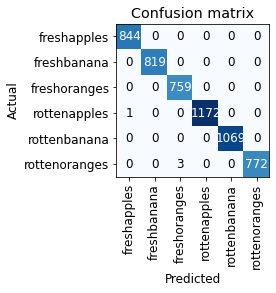

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [29]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [30]:
model_inf = load_learner(path/'export.pkl')

In [33]:
model_inf.predict('/content/dataset/test/freshapples/1.png')

('freshapples',
 tensor(0),
 tensor([1.0000e+00, 8.2810e-10, 2.0049e-09, 1.1623e-09, 2.8560e-11, 5.0370e-13]))

In [34]:
model_inf.dls.vocab

['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']